In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('E:/dev/ml_course_rv/ml_course_homework/iphone_purchase_records.csv')

In [3]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df["Purchase Iphone"].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df['Gender'] = pd.Categorical(df['Gender']).codes

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop(["Purchase Iphone", "Gender"], axis=1))

StandardScaler()

In [11]:
sk_features_scaled = scaler.transform(df.drop(["Purchase Iphone", "Gender"],axis=1))

In [12]:
df_features_scaled = pd.DataFrame(sk_features_scaled)

In [13]:
df_features_scaled.loc[:, 3] = df["Gender"]

In [14]:
df_features_scaled

,0,1,3
0,-1.781797,-1.490046,1
1,-0.253587,-1.460681,1
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,1
...,...,...,...
395,0.797057,-0.844019,0
396,1.274623,-1.372587,1
397,1.179110,-1.460681,0
398,-0.158074,-1.078938,1


In [15]:
X = df_features_scaled
y = df['Purchase Iphone']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=22)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
K = 1
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

In [21]:
pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[67  8]
 [12 33]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        75
           1       0.80      0.73      0.77        45

    accuracy                           0.83       120
   macro avg       0.83      0.81      0.82       120
weighted avg       0.83      0.83      0.83       120



In [24]:
error_rate = []

limit = 50

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rate.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

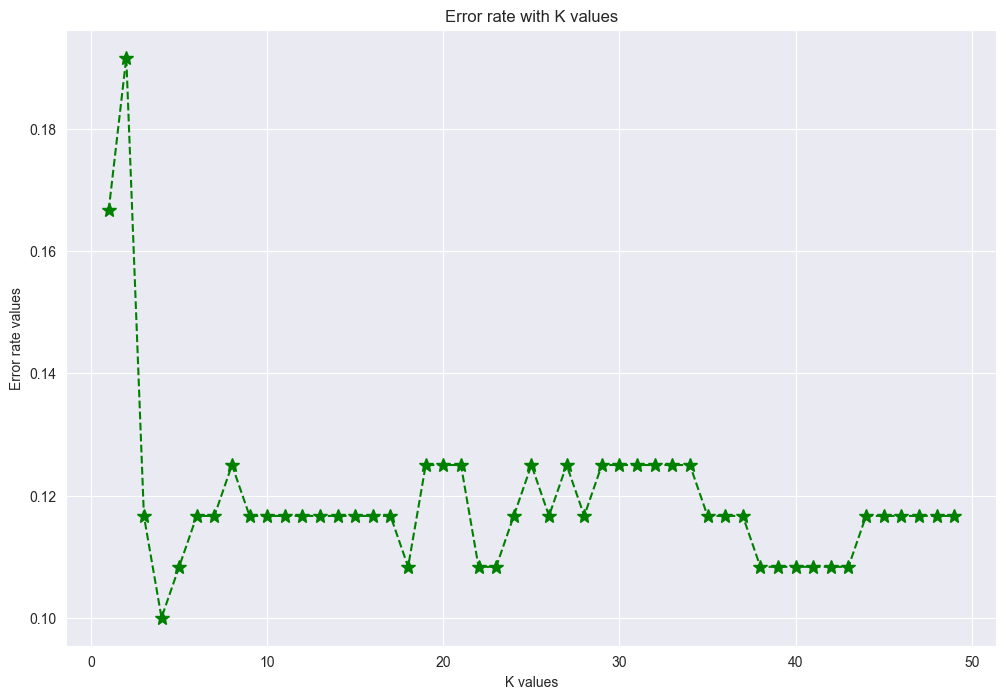

In [25]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit),error_rate, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [26]:
K = 5
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print("---------------")
print(classification_report(y_test, pred))

[[68  7]
 [ 6 39]]
---------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        75
           1       0.85      0.87      0.86        45

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.89      0.89       120

